## Import libraries and Read in Data
2 files - Daily Stock price data, Sector mapping file

In [23]:
import pandas as pd
import numpy as np
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)
#ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
# A,1999-11-18,45.5,50.0,40.0,44.0,44739900.0,0.0,1.0,31.041951216877,34.112034304261,27.289627443409,30.018590187749,44739900.0
# A,1999-11-19,42.94,43.0,39.81,40.38,10897100.0,0.0,1.0,29.295415060499,29.336349501664,27.160001713052,27.548878904121,10897100.0

#price_df = pd.read_csv("/data/work/osa/2018-04-eigenportfolios/WIKI_PRICES.csv")
price_df = pd.read_csv("/data/work/osa/2018-04-eigenportfolios/labxx-eigenportfolios/WIKI_PRICES.10000.csv")
sectors_df = pd.read_csv("/data/work/osa/2018-04-eigenportfolios/labxx-eigenportfolios/sectors.csv")


In [24]:
price_df.columns
sectors_df.columns

Index(['Ticker symbol', 'Security', 'SEC filings', 'GICS Sector',
       'GICS Sub Industry', 'Address of Headquarters',
       'Date first added[3][4]', 'CIK'],
      dtype='object')

In [25]:
price_df.ticker.unique()

array(['A', 'AA', 'AAL', 'AAMC', 'AAN'], dtype=object)

In [26]:
price_df[price_df.ticker == 'A'].head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


## Keep data within date range

In [27]:
# Type conversion for date column.  Just adding a new column called dt
price_df['dt'] = pd.to_datetime(price_df.date, unit='ns') # 
print(price_df.dtypes)

# For now use data from 2017 up through present
price_df = price_df[price_df.dt > '2017-01-01']
price_df = price_df[price_df.dt < '2018-04-01']

ticker                 object
date                   object
open                  float64
high                  float64
low                   float64
close                 float64
volume                float64
ex-dividend           float64
split_ratio           float64
adj_open              float64
adj_high              float64
adj_low               float64
adj_close             float64
adj_volume            float64
dt             datetime64[ns]
dtype: object


In [8]:
# reshape pandas array .  Here lets just grab the closing value...
price_df = price_df.pivot(index='date', columns='ticker', values='close')

In [28]:
# use dummy data here if you want ..
price_df = pd.read_csv("/data/work/osa/2018-04-eigenportfolios/labxx-eigenportfolios/dummydata.csv",index_col=0)
price_df

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,20.000000,99.414108,61.316427,55.407923,31.515909,68.457358,62.254758,82.233848,43.950667,49.549344,20.000000,99.414108,61.316427,55.407923,31.515909,68.457358,62.254758,82.233848,43.950667,49.549344,20.000000,99.414108,61.316427,55.407923,31.515909,68.457358,62.254758,82.233848,43.950667,49.549344
1,28.414710,100.215683,59.621647,53.230752,31.312019,67.324178,60.814131,84.910689,45.672101,49.206917,27.700253,91.692959,64.441936,52.815393,28.251589,72.383968,65.738450,87.168656,49.882727,50.561964,29.403105,82.971927,59.975076,54.473757,29.210564,71.324840,66.792427,95.526227,46.567665,50.311411
2,29.092974,98.918555,59.549896,52.360770,30.468429,64.802566,61.566577,82.409020,43.684108,49.955758,29.184742,81.657801,61.108679,55.000810,29.516218,72.424962,61.215406,86.858044,45.125401,48.230506,33.003641,68.265942,57.589579,61.389498,30.711518,76.085494,64.071604,102.896101,39.416365,48.769812
3,21.411200,94.699363,60.255114,52.549910,31.928282,67.987915,59.298613,86.308309,45.510148,48.303963,20.386697,76.475573,59.780939,56.655204,32.305015,80.743581,53.219526,90.865712,43.027221,42.335910,23.664302,66.353825,52.254224,64.500203,35.225007,81.481437,56.356088,114.975159,37.165087,39.695525
4,12.431975,93.106022,62.141372,52.412020,32.020569,67.236315,59.273909,85.663854,44.421218,50.039497,12.666277,73.318246,60.092399,53.831405,34.226901,81.527073,50.747307,96.483368,41.575829,47.773321,13.731609,58.093466,50.807115,66.945090,39.727053,82.971253,56.630028,127.021855,39.264025,47.368633
5,10.410757,93.109362,60.558831,51.037079,33.435277,68.142689,58.199568,89.360846,43.750369,49.201658,11.347286,80.069728,60.534198,49.221163,39.082545,89.765511,45.755401,105.464760,40.627412,46.324262,11.189917,65.915429,49.876727,55.457480,41.937767,90.779439,50.908093,130.781185,38.053535,44.898189
6,17.205845,95.215477,62.286707,51.136915,32.981567,70.682718,60.067157,91.780153,45.089265,46.882510,18.694729,83.379210,61.131741,50.126739,36.908399,89.889416,50.474160,102.548086,44.175685,45.545042,18.835921,69.445125,50.210843,61.459439,43.105248,88.678486,52.125025,118.025587,39.680296,41.459179
7,26.569866,92.619247,63.634666,52.618268,32.090811,71.440441,61.940591,93.109498,43.486045,45.738039,28.670812,76.634042,63.865013,50.103170,32.605622,95.965147,54.259900,112.383611,42.737558,46.922429,27.160475,69.832788,51.149734,62.911931,34.396999,101.684749,54.299446,126.037943,39.137458,38.533212
8,29.893582,95.731858,63.940724,51.115605,31.585528,71.027722,60.348060,94.295887,41.717420,44.365262,30.423524,82.578495,65.244817,44.026042,34.355323,103.941351,55.469040,117.254355,40.844701,49.128860,27.126480,73.651716,57.064825,54.892907,37.797182,106.862442,59.120849,141.532168,34.460541,38.290646
9,24.121185,96.921858,66.907944,50.100758,31.964977,73.136064,63.020499,89.630152,42.404641,46.545091,23.233737,83.779197,64.473509,40.586190,34.572349,104.594212,54.233056,104.351662,44.639917,51.550819,21.561347,80.410350,58.645022,53.062004,39.486941,97.717730,57.547529,132.481696,40.126838,41.209856


## Create daily return dataframe using pandas convenience function..

In [29]:
daily_return_df = price_df.pct_change()
# drop columns with 3 or more NaN
daily_return_df.dropna(axis=1, thresh=3, inplace=True)
#daily_return_df.dropna(axis=0, inplace=True)

In [13]:
# impute NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'mean')
imputer.fit(daily_return_df)
daily_return_df2 = imputer.transform(daily_return_df)
daily_return_df = pd.DataFrame(daily_return_df2,columns=daily_return_df.columns)

In [14]:
daily_return_df.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,0.062549,0.001476,0.001541,0.003218,-0.004462,0.004798,-0.008858,0.000576,-0.003907,0.000625,0.060532,-0.012351,-0.001288,0.000390,0.000068,0.009309,-0.011472,0.022225,0.001924,0.004331,0.068089,-0.015217,0.006376,-0.012895,0.011353,0.010326,-0.032078,0.013213,-0.012295,0.015421
1,0.420735,0.008063,-0.027640,-0.039293,-0.006469,-0.016553,-0.023141,0.032552,0.039167,-0.006911,0.385013,-0.077667,0.050973,-0.046790,-0.103577,0.057358,0.055959,0.060009,0.134971,0.020437,0.470155,-0.165391,-0.021876,-0.016860,-0.073149,0.041887,0.072889,0.161641,0.059544,0.015380
2,0.023870,-0.012943,-0.001203,-0.016344,-0.026941,-0.037455,0.012373,-0.029462,-0.043528,0.015218,0.053591,-0.109443,-0.051725,0.041378,0.044763,0.000566,-0.068804,-0.003563,-0.095370,-0.046111,0.122454,-0.177240,-0.039775,0.126955,0.051384,0.066746,-0.040735,0.077150,-0.153568,-0.030641
3,-0.264042,-0.042653,0.011842,0.003612,0.047914,0.049155,-0.036838,0.047316,0.041801,-0.033065,-0.301460,-0.063463,-0.021728,0.030079,0.094484,0.114858,-0.130619,0.046140,-0.046497,-0.122217,-0.282979,-0.028010,-0.092644,0.050672,0.146964,0.070919,-0.120420,0.117391,-0.057115,-0.186064
4,-0.419370,-0.016825,0.031305,-0.002624,0.002890,-0.011055,-0.000417,-0.007467,-0.023927,0.035929,-0.378699,-0.041285,0.005210,-0.049842,0.059492,0.009703,-0.046453,0.061824,-0.033732,0.128435,-0.419733,-0.124490,-0.027694,0.037905,0.127808,0.018284,0.004861,0.104777,0.056476,0.193299
5,-0.162582,0.000036,-0.025467,-0.026233,0.044181,0.013480,-0.018125,0.043157,-0.015102,-0.016744,-0.104134,0.092085,0.007352,-0.085642,0.141866,0.101052,-0.098368,0.093087,-0.022812,-0.030332,-0.185098,0.134644,-0.018312,-0.171597,0.055648,0.094107,-0.101041,0.029596,-0.030829,-0.052154
6,0.652699,0.022620,0.028532,0.001956,-0.013570,0.037275,0.032089,0.027073,0.030603,-0.047136,0.647507,0.041333,0.009871,0.018398,-0.055630,0.001380,0.103130,-0.027655,0.087337,-0.016821,0.683294,0.053549,0.006699,0.108226,0.027838,-0.023143,0.023904,-0.097534,0.042749,-0.076596
7,0.544235,-0.027267,0.021641,0.028968,-0.027008,0.010720,0.031189,0.014484,-0.035557,-0.024411,0.533631,-0.080897,0.044711,-0.000470,-0.116580,0.067591,0.075004,0.095911,-0.032555,0.030242,0.441951,0.005582,0.018699,0.023633,-0.202023,0.146668,0.041715,0.067887,-0.013680,-0.070575
8,0.125093,0.033607,0.004810,-0.028558,-0.015745,-0.005777,-0.025711,0.012742,-0.040671,-0.030014,0.061132,0.077569,0.021605,-0.121292,0.053663,0.083116,0.022284,0.043340,-0.044290,0.047023,-0.001252,0.054687,0.115643,-0.127464,0.098851,0.050919,0.088793,0.122933,-0.119500,-0.006295
9,-0.193098,0.012431,0.046406,-0.019854,0.012013,0.029683,0.044284,-0.049480,0.016473,0.049134,-0.236323,0.014540,-0.011822,-0.078132,0.006317,0.006281,-0.022282,-0.110040,0.092918,0.049298,-0.205155,0.091765,0.027691,-0.033354,0.044706,-0.085575,-0.026612,-0.063946,0.164429,0.076238


## Plot some series

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

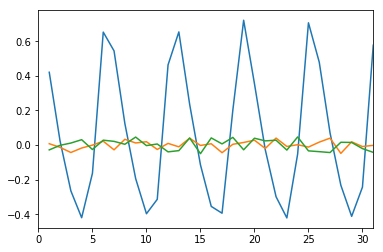

In [30]:
plt.figure()
#daily_return_df.A.plot()
#daily_return_df.AAPL.plot()
#daily_return_df.IBM.plot()

daily_return_df.S1.plot()
daily_return_df.S2.plot()
daily_return_df.S3.plot()

## Optional  : Save intermediate file and read back in .. Next time can start here

In [150]:
daily_return_df.to_csv(path_or_buf='daily_return_2017.csv')
daily_return_df = pd.read_csv('daily_return_2017.csv')

In [151]:
daily_return_df2.head(15)

,Unnamed: 0,A,AA,AAL,AAMC,AAN,AAOI,AAON,AAP,AAPL,AAT,AAWW,ABAX,ABBV,ABC,ABCB,ABCO,ABG,ABM,ABMD,ABT,ACAD,ACAT,ACC,ACCO,...,XXII,XYL,Y,YDKN,YELP,YHOO,YORW,YRCW,YUM,YUME,Z,ZAGG,ZBH,ZBRA,ZEN,ZEUS,ZGNX,ZION,ZIOP,ZIXI,ZLTQ,ZNGA,ZOES,ZTS,ZUMZ
0,0,0.001256,0.001720,0.000481,0.001482,0.001429,0.001569,0.000563,-0.000966,0.001287,-0.000828,0.000663,0.001126,0.001411,0.000204,0.000729,0.002172,0.000284,-0.000581,0.003187,0.001469,-0.000294,0.006007,-0.000837,-0.000042,...,0.003497,0.001459,-0.000041,0.000202,0.000624,0.002742,-0.000531,-0.000895,0.000965,0.000564,0.001389,0.002416,0.000241,0.001621,0.002751,-0.000068,0.006523,0.000720,-0.000258,-0.000161,0.003426,0.001273,-0.001063,0.001435,0.000749
1,1,0.013121,0.049601,0.008639,0.055660,0.021003,0.017749,0.022489,0.008206,-0.001119,0.019517,0.011639,-0.003170,0.014100,0.024815,0.021739,-0.027616,0.024000,0.015686,0.030082,0.007939,0.110184,0.057308,0.027254,0.022727,...,-0.027523,0.014904,0.005108,0.010477,0.031397,0.029820,0.011749,0.044313,0.003639,0.011019,-0.003493,0.049296,0.009194,0.009043,0.004519,0.047306,0.011765,0.014358,0.058501,0.008065,0.045527,0.015094,0.048978,0.009703,0.034091
2,2,-0.011890,0.012888,-0.017345,0.036640,-0.038686,-0.029775,-0.029326,-0.000698,0.005085,0.001823,-0.019175,-0.014964,0.007584,-0.011576,-0.010078,0.020927,-0.018750,-0.020994,-0.008035,0.008638,-0.008140,-0.007917,0.004987,-0.014815,...,-0.141509,-0.009129,-0.008112,-0.014689,0.005074,0.031952,-0.010323,-0.020509,0.003310,-0.029973,-0.018064,-0.020134,0.006425,-0.026198,0.004948,-0.010998,0.011628,-0.016210,-0.027634,-0.018000,-0.037418,-0.014870,0.037353,-0.003327,-0.094505
3,3,0.031156,0.000979,0.006973,0.017241,-0.014372,-0.017098,-0.012085,-0.013091,0.011148,-0.005232,-0.007820,0.017850,0.000314,0.013384,-0.002262,0.064422,-0.016720,-0.018733,0.005313,0.027204,0.030303,-0.019030,0.004764,-0.011278,...,-0.025604,-0.007010,0.004073,0.006431,-0.007824,-0.002661,-0.035202,-0.013718,0.012097,0.005618,0.007688,0.013699,0.000095,0.014277,0.005819,-0.046465,-0.019157,0.006498,0.024867,-0.002037,-0.018641,0.026415,0.008219,0.003152,-0.036408
4,4,0.003126,-0.039113,0.018827,0.015254,0.012638,-0.008029,0.003058,-0.000590,0.009160,-0.014635,0.004926,0.026493,0.006584,0.008019,-0.027211,-0.030261,0.008097,-0.010048,0.014642,-0.000981,0.001532,-0.076345,-0.010865,-0.030418,...,-0.023119,-0.004236,-0.014116,-0.014813,0.021114,0.002668,-0.033784,-0.024890,0.002794,-0.005587,0.006812,-0.020270,0.019436,0.000116,0.032043,0.022907,-0.003906,-0.010837,-0.003466,0.006122,-0.010656,-0.022059,-0.081522,-0.002773,0.005038
5,5,-0.000831,0.050882,0.029737,0.000835,0.038080,0.028327,0.018293,0.002300,0.001008,0.001857,0.022549,-0.116867,-0.002180,-0.007604,0.018648,0.001418,0.019277,0.004060,-0.041585,0.013500,-0.037320,-0.045393,-0.010186,0.019608,...,-0.007273,-0.004659,-0.005392,0.010318,0.006477,0.023222,0.015385,-0.012763,0.005882,0.002809,-0.008119,-0.013793,0.062336,-0.006165,-0.011212,0.115635,0.000000,0.015385,0.013913,0.006085,-0.046827,-0.022556,-0.000845,-0.000371,0.012531
6,6,0.023909,0.031956,0.003300,0.070058,0.001850,-0.006559,0.010479,0.020657,0.005373,-0.003706,0.019175,0.033546,-0.045731,-0.038901,0.019451,0.024079,-0.002364,0.016174,-0.008642,-0.005086,-0.050842,-0.014194,-0.007869,-0.015385,...,0.018723,0.005291,0.016464,0.004377,0.007426,0.006856,0.023416,0.002281,-0.007541,0.025210,-0.015553,-0.027972,0.009501,-0.005267,0.024422,-0.002920,-0.070588,0.008264,-0.072041,0.004032,0.005650,0.011538,-0.024958,-0.011496,-0.022277
7,7,-0.014822,0.033469,-0.011102,-0.005456,-0.002769,0.314261,-0.034074,0.005997,-0.004175,0.002558,-0.024459,-0.014735,0.002290,0.028578,-0.029181,0.161826,0.005529,-0.010943,0.009886,-0.008763,0.063944,-0.017279,0.001627,-0.023438,...,-0.041096,-0.022267,-0.000968,-0.025276,-0.000246,-0.011270,-0.039031,0.031866,0.002636,-0.016393,0.023559,-0.014388,-0.002789,-0.014472,0.021711,-0.040264,-0.029536,-0.021630,0.077634,-0.006024,0.017831,0.015209,-0.022560,0.001501,-0.007595
8

## Start some data analysis here !

In [32]:
daily_return_df.corr().head(20)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19,S20,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
S1,1.000000,0.223280,-0.310724,0.016918,-0.005527,-0.198892,0.010077,-0.143349,0.250987,0.390444,0.990418,-0.390887,-0.207763,0.066689,-0.276928,0.003074,0.025795,0.097799,0.325365,0.510670,0.984387,-0.189002,-0.131956,-0.045115,-0.198815,0.241100,-0.010939,-0.094592,0.202231,0.424338
S2,0.223280,1.000000,0.027363,0.048034,-0.246572,-0.110631,-0.055067,-0.036566,-0.161512,0.223549,0.204573,0.291133,-0.152130,-0.091966,-0.259723,-0.332028,0.173322,0.016232,0.375699,0.323810,0.222461,0.055091,-0.062939,-0.117295,-0.183869,-0.383053,0.159572,0.054683,0.177929,0.265954
S3,-0.310724,0.027363,1.000000,0.000544,-0.215055,0.257354,0.441887,0.043341,0.012000,-0.277199,-0.341055,0.425235,0.353539,-0.054985,-0.125168,0.080521,0.213288,-0.016801,0.177270,-0.133469,-0.347192,0.414953,0.272371,0.304907,0.010373,-0.082943,0.105316,0.041966,0.100112,-0.180031
S4,0.016918,0.048034,0.000544,1.000000,-0.075491,-0.031914,-0.088722,0.123572,-0.271456,0.114152,0.029144,-0.190947,0.045567,0.180132,-0.052546,-0.208453,0.043675,0.213443,-0.230273,0.037373,-0.009253,0.168635,0.126235,0.082613,-0.132734,-0.177824,-0.003937,0.171066,-0.172069,0.011126
S5,-0.005527,-0.246572,-0.215055,-0.075491,1.000000,0.225612,-0.402551,-0.010334,0.095763,0.114764,-0.014189,0.011399,-0.040987,-0.125034,0.600011,0.190396,-0.344061,-0.309556,-0.052673,-0.086314,0.011135,-0.031181,-0.067691,-0.138335,0.467663,0.266184,-0.297984,-0.138236,0.105861,-0.022985
S6,-0.198892,-0.110631,0.257354,-0.031914,0.225612,1.000000,0.157993,0.157645,0.383341,-0.418170,-0.220458,0.281337,0.259431,0.037687,0.345033,0.478556,0.043499,-0.128269,0.123072,-0.248686,-0.206035,0.391815,0.000169,-0.121340,0.290440,0.137305,-0.057577,-0.130733,0.190205,-0.209423
S7,0.010077,-0.055067,0.441887,-0.088722,-0.402551,0.157993,1.000000,-0.215189,0.015700,-0.028302,-0.000230,0.056722,0.148878,0.004355,-0.330380,0.114240,0.254720,-0.154542,0.202910,0.021182,-0.038102,0.176693,0.196609,0.282506,-0.234698,-0.159736,0.099457,-0.055218,0.225267,-0.146074
S8,-0.143349,-0.036566,0.043341,0.123572,-0.010334,0.157645,-0.215189,1.000000,0.113714,-0.328162,-0.120104,0.210374,0.450953,-0.189603,0.007564,0.289862,0.022113,0.621592,-0.104825,-0.009142,-0.168243,0.398902,0.142266,-0.270060,-0.166477,0.269960,0.079209,0.507990,-0.112156,-0.161792
S9,0.250987,-0.161512,0.012000,-0.271456,0.095763,0.383341,0.015700,0.113714,1.000000,0.078519,0.250391,0.030874,-0.041082,0.151808,-0.074743,0.157739,-0.216891,0.078587,0.595257,-0.003831,0.288363,0.094321,-0.221597,-0.093173,0.085944,0.026970,-0.119707,0.017171,0.576115,0.077472
S10,0.390444,0.223549,-0.277199,0.114152,0.114764,-0.418170,-0.028302,-0.328162,0.078519,1.000000,0.402390,-0.390255,-0.405622,0.112418,0.030308,-0.395499,-0.273518,-0.089702,0.289682,0.571588,0.404950,-0.258989,-0.163541,-0.028666,-0.042167,-0.255598,-0.060642,0.055145,0.384724,0.656409


In [33]:
num_symbols = len(daily_return_df.columns)
num_symbols

30

In [34]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
dr_pca_df = pca.fit_transform(daily_return_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [22]:
np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_


array([0.80555, 0.04058, 0.03554, 0.02579, 0.01936, 0.014  , 0.01349,
       0.00898, 0.0075 , 0.00543, 0.00491, 0.00399, 0.00292, 0.00215,
       0.00191, 0.00164, 0.00137, 0.00112, 0.00097, 0.00077])